In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [4]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
218760,587725076066468464,140.76184403,0.88138861,19.285234,0.19148,4,G09_Y2_016_317,6,20.92196,19.863764,19.221165,18.91657,18.758524,658.2304679092451,39.09188990436649,G9,-427.8330938224349,349.4068458150677,8.49804217431823,0.6425991,0.48144473504871893,0,3,-0.08253885963365701,0.07861551115258505,0.11357102748632342,0.3017968172070399,0.4543733161142445,2.12,-0.1857356,-0.40593758,-19.734490882352347,-19.514288898304457,39.01972533364629,38.7995233495984
514222,588010357995208988,140.43170714,2.70322146,18.915146,0.14678,4,G09_Y2_042_287,6,21.589085,19.783735,18.913113,18.392132,18.141521,490.20543377838897,38.45189060482602,G9,-329.1495629694051,271.98953125357735,20.16024784947387,0.87062263,0.7728269220198738,0,5,-0.05485153795869698,0.04294417490912461,0.17349867310879555,0.3710348496743173,0.6730864583221735,0.8,-0.1423766,-0.117424004,-19.567866802215363,-19.59281940013149,38.4830126762388,38.50796527415493
136729,587724650329014562,175.98187034,-1.68652677,17.821947,0.10723,4,G12_Y1_BS1_111,6,20.750114,18.915552,17.888975,17.370033,16.957827,348.57500517451376,37.7114812124361,G12,-313.90729155002373,22.05035129652807,-9.26544554551312,1.026577,1.0076820215507178,0,6,-0.09325731567799292,-0.07436234137910137,0.14132080272041764,0.324264347557832,0.843633451012195,0.8,-0.1040131,-0.085784,-19.92684181711174,-19.945070914239654,37.748788914890056,37.76701801201797
8301,588848900987158689,181.68685894,0.7011761,17.671268,0.09026,4,G12_Y6_061_170,6,20.462242,18.581089,17.676947,17.264162,16.943651,289.90010408167615,37.31124185639019,G12,-265.7648322504193,-7.826708372577856,3.253957772909903,0.9041424,0.9274551055428526,0,6,-0.11610680033790788,-0.13941952612018324,0.11045695863690697,0.24497721963462613,0.769622118763023,0.8,-0.087552205,-0.072208,-19.662878147164204,-19.678222349682667,37.33414661029897,37.349490812817436
660000,587729150915772570,140.29266091,-1.49659397,18.37324,0.19381,4,G09_Y4_215_048,6,20.901785,19.268467,18.358198,18.044136,17.891954,667.2133985674924,39.12132379475438,G9,-429.8204948973231,356.9368642006288,-14.596929953902679,0.9102688,0.7098572373522847,0,5,-0.02343535675875605,0.17697618945829519,0.20062064455143294,0.4817345989168716,0.6291548292038973,2.12,-0.1879957,-0.41087717,-20.760709220065625,-20.53782775391534,39.13394873727754,38.91106727112726
345969,587726033301209510,131.84474743,1.97358773,19.54565,0.26095,4,G09_Y3_024_111,5,22.761194,21.052927,19.575912,19.074472,18.725279,935.2452451958234,39.85462754457326,G9,-494.50458449144605,552.2047314010108,25.54321579551912,1.4770145,0.9962657073577251,0,6,0.13130690507558437,0.612055739343836,0.36464012287634134,1.00882229587145,0.8328323686308681,0.8,-0.2531215,-0.20876001,-20.420495690024982,-20.464857177055965,39.96614617220271,40.010507659233696
262800,587726015623856358,221.23507916,2.2316643,19.523146,0.14096,4,G15_Y4_220_128,5,22.273722,20.373041,19.415947,18.840586,18.559278,468.942043023823,38.35559585589638,G15,-308.8472360150555,-270.7095026204053,16.004613016680906,0.9570942,0.8588496288146525,0,5,-0.054556461327301436,0.04368810236292883,0.17325262861215815,0.403139247848019,0.727207573269022,0.8,-0.13673119,-0.112767994,-18.868971616379763,-18.89293481444552,38.39211729203895,38.416080490104704

In [5]:
def color_plot(ctype, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    for count, jj in enumerate(np.unique(idx)):
        sample = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                     sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)
    plt.xlabel(ctype)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    plt.xlim(-0.5, max_col)
    plt.legend(frameon=False)

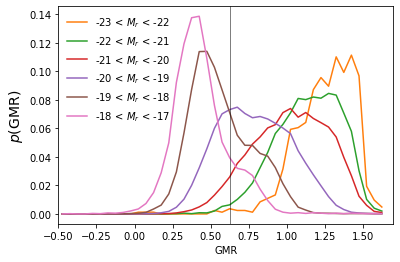

In [6]:
color_plot('GMR', max_col=1.7)

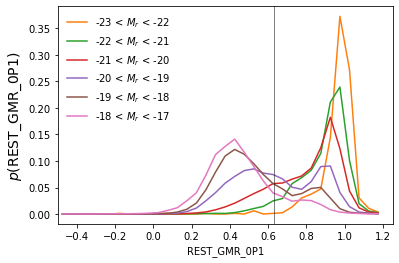

In [7]:
color_plot('REST_GMR_0P1', max_col=1.25)

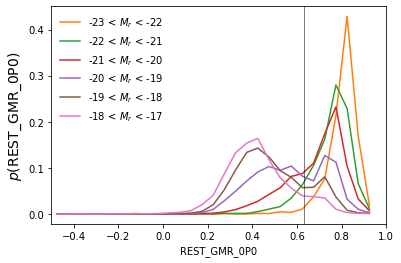

In [8]:
color_plot('REST_GMR_0P0')

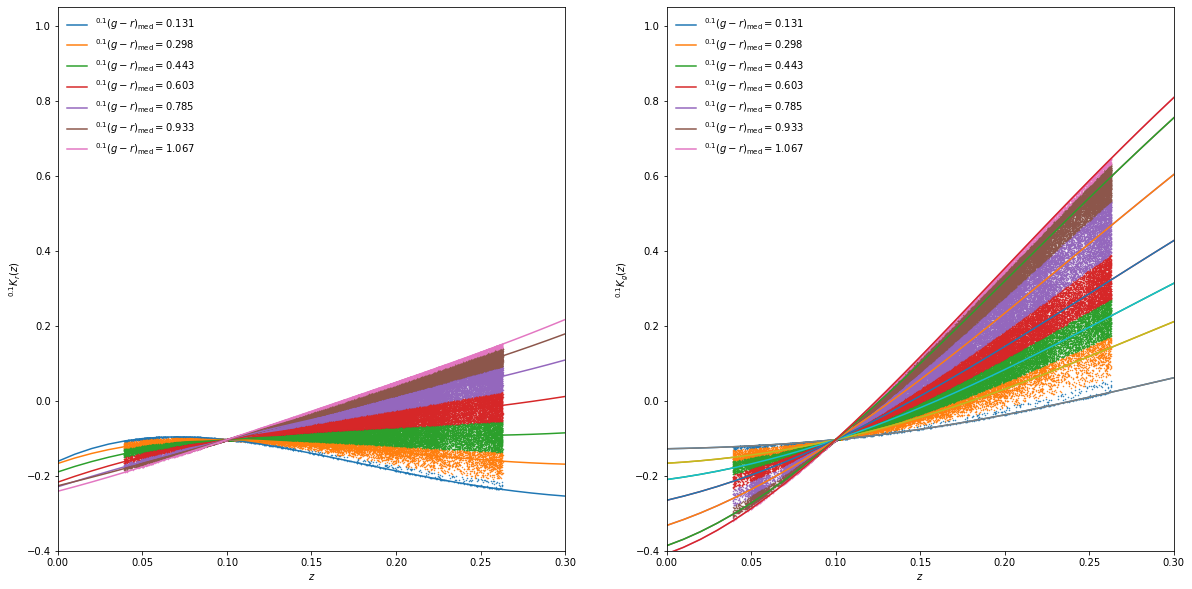

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

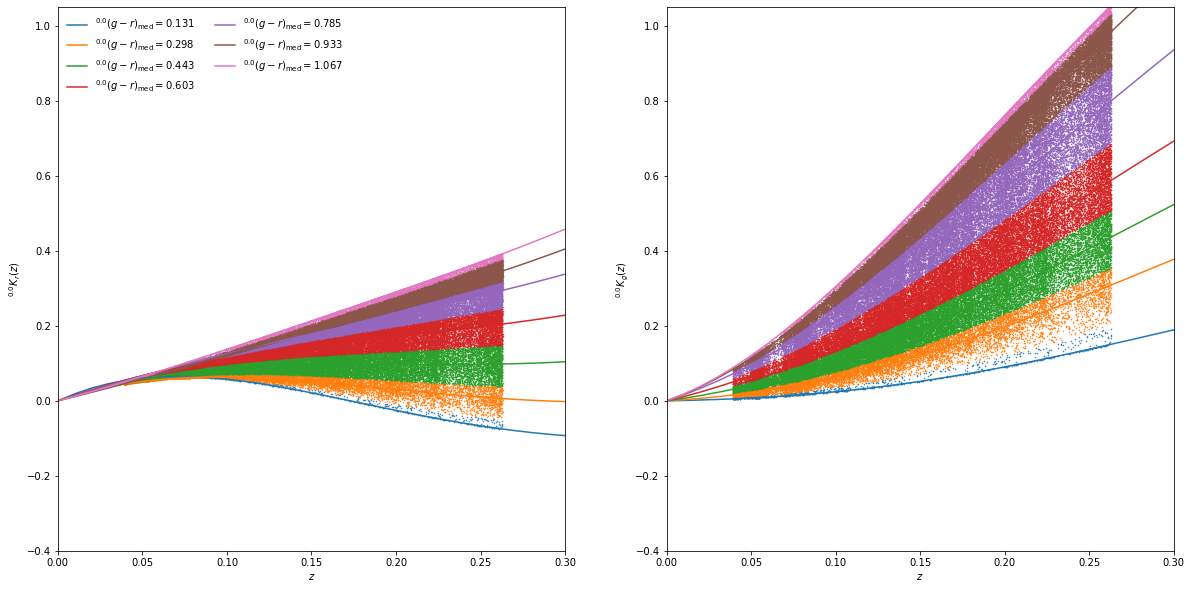

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=2, frameon=False, loc=2)

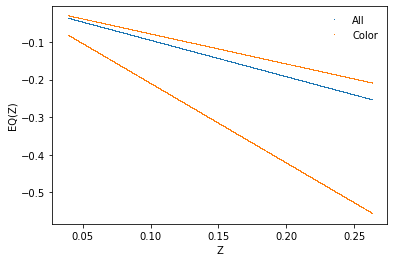

In [11]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')

pl.xlabel('Z')
pl.ylabel('EQ(Z)')

pl.legend(frameon=False)

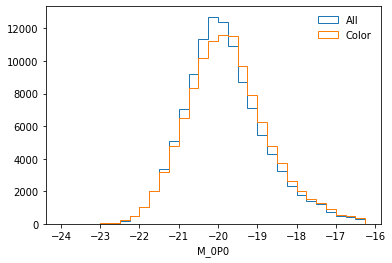

In [12]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel('M_0P0')

pl.legend(frameon=False)

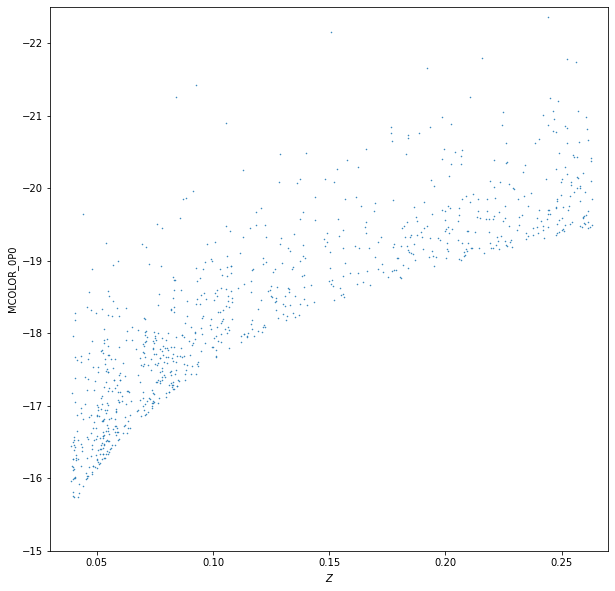

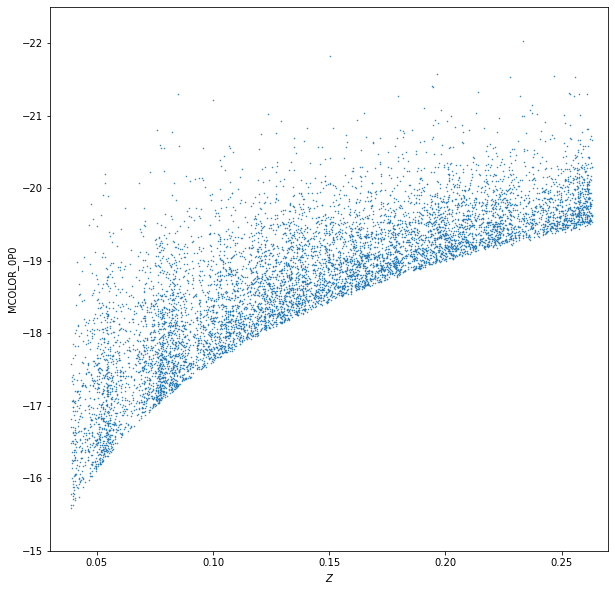

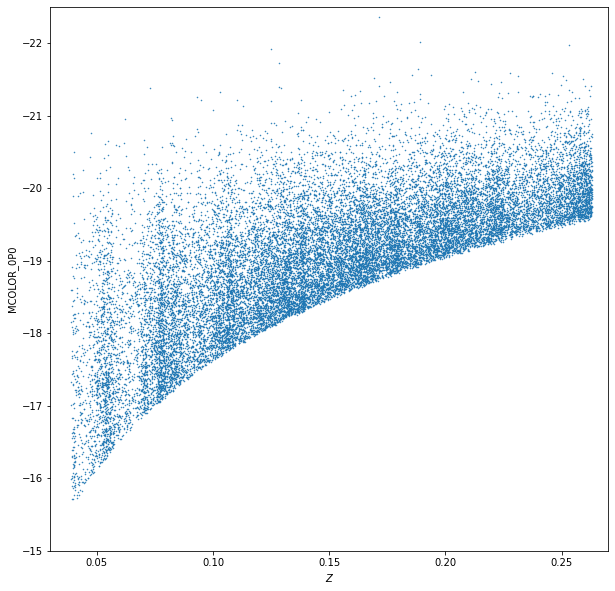

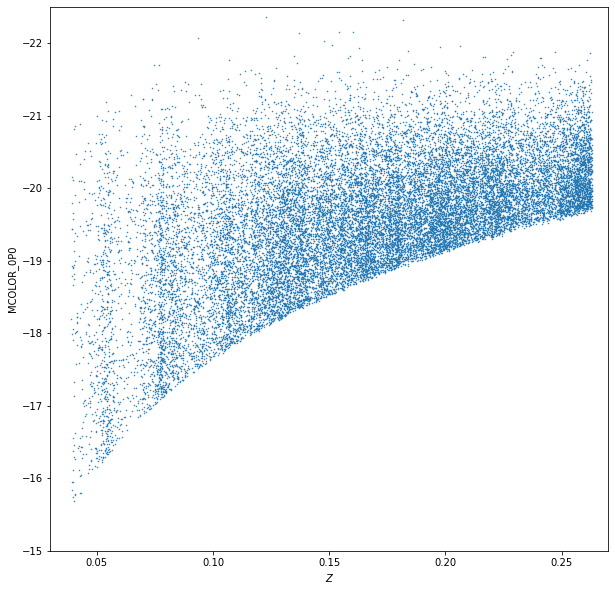

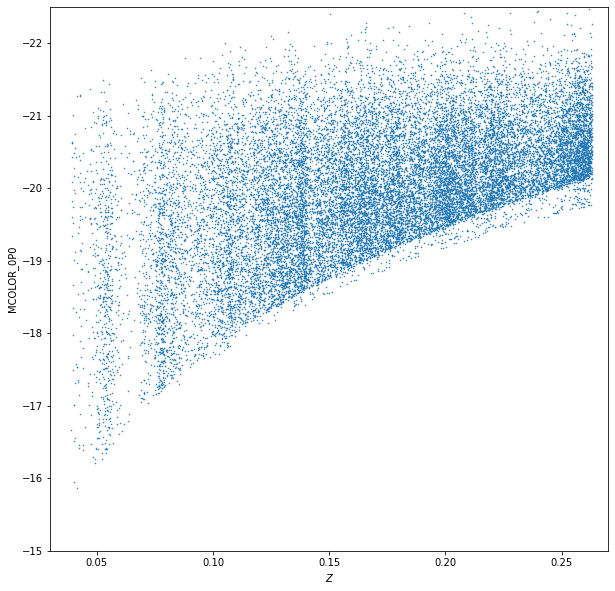

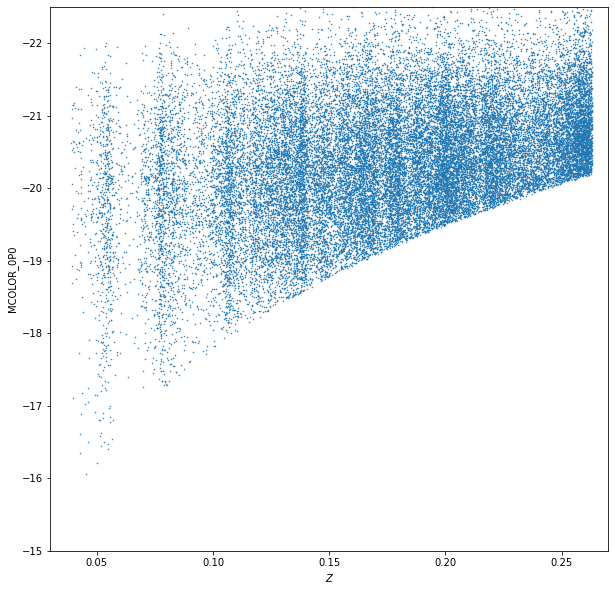

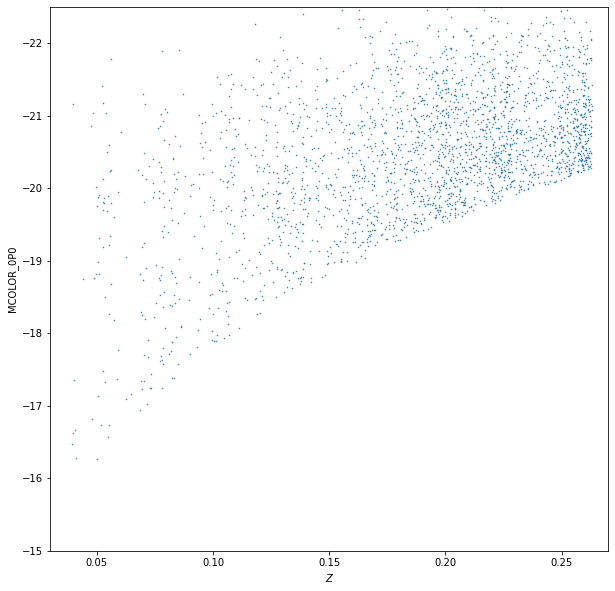

In [13]:
for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    pl.sca(ax)
    
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx

    plt.scatter(gama_kE['ZGAMA'][isin], gama_kE['MCOLOR_0P0'][isin], s=0.25)

    plt.xlabel(r'$Z$')
    plt.ylabel(r'MCOLOR_0P0')
    plt.xlim(0.03, 0.27)
    plt.ylim(-15., -22.5)    
    pl.show()

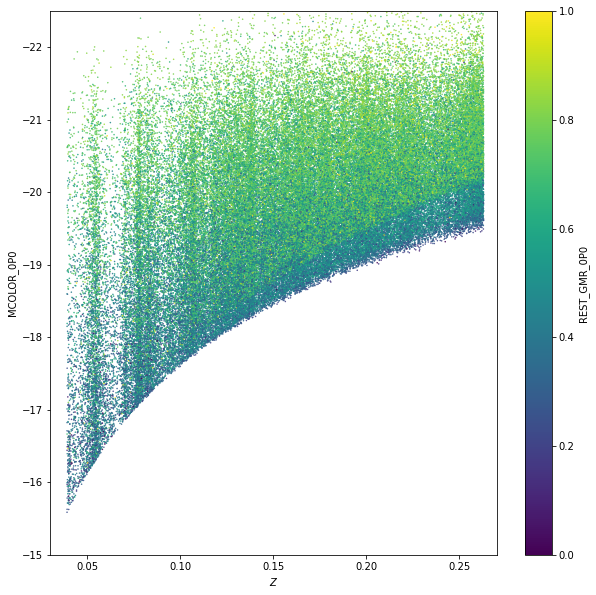

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$Z$')
plt.ylabel(r'MCOLOR_0P0')
plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)
plt.colorbar(label='REST_GMR_0P0')

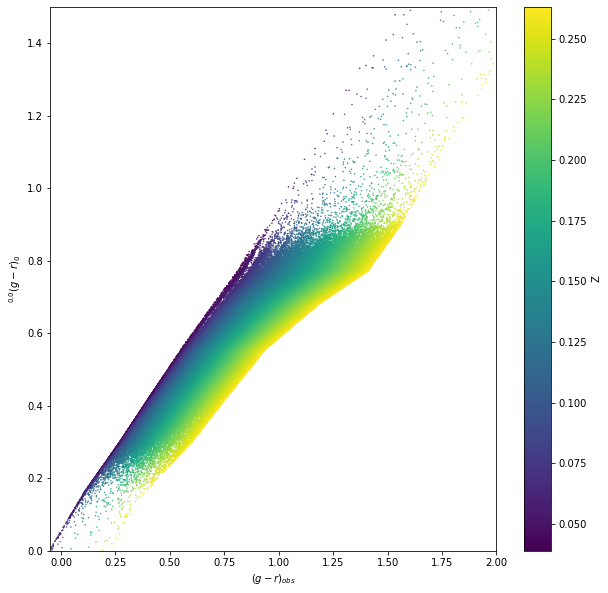

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)_{obs}$')
plt.ylabel(r'$^{0.0}(g-r)_0$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='Z')

In [16]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

masked_array(data=[0, 1, 2],
             mask=[False, False, False],
       fill_value=999999,
            dtype=int32)

In [17]:
spurious = gama_kE[gama_kE['REST_GMR_0P1_WARN'].data > 0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
300927,587726032227270668,131.3272206,1.09080836,18.831516,0.11724,4,G09_Y1_BN1_028,6,24.28935,17.80039,19.094442,18.916586,18.537155,383.7810583202455,37.92041768068411,G9,-226.79743979434815,257.91088559871883,6.539381410623125,-1.2940521,-99.0,2,1,-0.11355235418874031,-0.09522954963899631,0.04772836511763377,0.03261506184962844,-1.2789388207554322,2.12,-0.1137228,-0.24854878,-19.02290697872411,-18.888081004021274,37.85442324459325,37.719597269890414
250320,587726015084036103,214.45952369,2.03787936,19.563774,0.05858,4,G15_Y4_218_043,5,20.229671,18.227365,19.269266,18.401218,16.841839,183.83041848711568,36.32208687932179,G15,-143.09462765722216,-98.19744695063372,6.175298294532694,-1.0419006,-99.0,2,1,-0.09754854334409607,-0.11801539778216788,0.06373217596227801,0.009829213706456869,-0.9879976725098039,2.12,-0.0568226,-0.12418959,-16.76522234469156,-16.697855353499456,36.32899645357828,36.261629462386175
3586069,587729150376542291,134.93433216,-1.68857138,19.048208,0.1016,4,G09_Y4_207_081,6,21.36026,21.069447,18.996756,18.712885,18.48635,328.96735095614054,37.58576398818161,G9,-210.82732477354077,211.31114633862657,-8.799596788715686,2.072691,-99.0,2,1,-0.10426733235617135,-0.10277204141208078,0.057013386950202735,0.025072570076543968,2.1046317806187758,0.8,-0.098552,-0.08128,-18.496017134934633,-18.513289137929647,37.54422537162897,37.56149737462398
463329,587729774758658180,212.50919903,-1.23042467,18.993248,0.11687,4,G15_Y1_AX2_304,6,21.856676,21.307579,19.185923,18.606459,18.508097,382.47198080656693,37.91299812520232,G15,-288.7231411736381,-184.00210274916608,-7.353532192291313,2.1216564,-99.0,2,1,-0.11330226386937975,-0.09542074191814612,0.04797845543699433,0.03242386957047863,2.1372110037131953,0.8,-0.11336391,-0.093496,-18.85436468805833,-18.8742325925426,37.847612673898176,37.86748057838245
106622,587722984440529032,216.71278177,0.96640172,18.756065,0.14396,4,G15_Y1_DN2_023,6,21.890177,20.875301,18.743675,18.292803,17.95915,479.88461679130455,38.405684141934145,G15,-336.23648543054406,-250.7396546567538,7.075228317101729,2.1316261,-99.0,2,1,-0.1345413892617163,-0.07978275998180517,0.026739330044657783,0.048061851506819575,2.1103036076882287,0.8,-0.13964121,-0.115168,-19.53671689288964,-19.561190105549,38.29278226154198,38.31725547420134
376803,587727943490601117,135.15747214,1.46673551,19.284964,0.05207,4,G09_Y2_010_233,6,18.484238,19.773998,17.6414,17.31554,17.007395,162.60301546426533,36.05564297650389,G9,-109.551159176484,108.95062575855222,3.956085676070129,2.1325989,-99.0,2,1,-0.09974506342315637,-0.11966564751392851,0.061535655883217716,0.008178963974696238,2.1859555688616465,0.8,-0.0505079,-0.041656,-16.781707125225253,-16.790559025922008,36.06667073301334,36.075522633710094
64501,587722982831030680,219.36930883,-0.26832705,18.0969,0.13763,4,G15_Y3_033_005,6,21.164711,20.593689,18.45563,18.068895,17.772223,456.840701987018,38.29882395102362,G15,-310.4414926574121,-254.72114847805562,-1.8806327533873746,2.1380596,-99.0,2,1,-0.1291273968767528,-0.08373353714976081,0.032153322429621295,0.04411107433886394,2.1261018641796245,0.8,-0.1335011,-0.110104,-20.100575235951908,-20.12397233145333,38.197476175893314,38.22087327139474
422141,587728879792685436,129.64207134,2.58860397,19.5044,0.13235,

# Done.